### Example Imbalanced Dataset

In [12]:
import sklearn as skl
skl.__version__

'0.22.1'

Counter({0: 985, 1: 15})


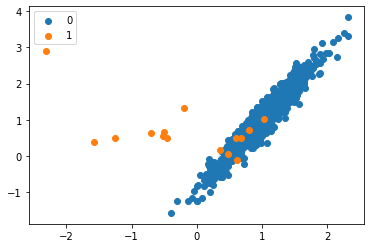

CPU times: user 1.53 s, sys: 517 ms, total: 2.05 s
Wall time: 14 s


In [1]:
%%time
# plot imbalanced classification problem
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
%matplotlib inline
from numpy import where
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99, 0.01])
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Evaluate Imbalanced Classification Models

Run it several times and see how the results change

In [2]:
%%time
# evaluate imbalanced classification model with different metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.993
Precision: 0.944
Recall: 0.340
F-measure: 0.500
CPU times: user 88.3 ms, sys: 42 ms, total: 130 ms
Wall time: 949 ms


In [5]:
testy

array([0, 0, 0, ..., 0, 0, 0])

In [3]:
import numpy
numpy.unique(y, return_counts=True)

(array([0, 1]), array([9900,  100]))

### Classification Metrics

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Positive=1, Negative=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [7]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [8]:
binary_classifier_metrics(testy, yhat)

{'TruePositive': 17,
 'TrueNegative': 4949,
 'FalsePositive': 1,
 'FalseNegative': 33,
 'Positive': 50,
 'Negative': 4950,
 'Recall': 0.34,
 'TrueNegativeRate': 0.9997979797979798,
 'Precision': 0.9444444444444444,
 'Accuracy': 0.9932,
 'FalsePositiveRate': 0.00020202020202020202,
 'FalseNegativeRate': 0.66,
 'F1': 0.5}

### Accuracy for evaluating Imbalanced Classification

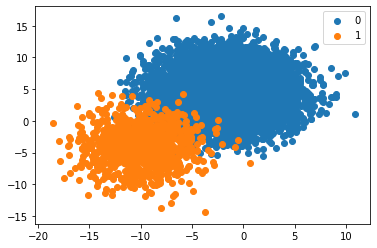

Class 0: 90.909%, Class 1: 9.091%
Accuracy: 90.909%


In [11]:
# evaluate a majority class classifier on an 1:100 imbalanced dataset
from numpy import mean
from numpy import hstack
from numpy import vstack
from numpy import where
from numpy import unique
from matplotlib import pyplot

from sklearn.datasets import make_blobs
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# create a dataset with a given class distribution
def get_dataset(proportions):
    # determine the number of classes
    n_classes = len(proportions)
    # determine the number of examples to generate for each class
    largest = max([v for k,v in proportions.items()])
    n_samples = largest * n_classes
    # create dataset
    X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1, cluster_std=3)
    # collect the examples
    X_list, y_list = list(), list()
    for k,v in proportions.items():
        row_ix = where(y == k)[0]
        selected = row_ix[:v]
        X_list.append(X[selected, :])
        y_list.append(y[selected])
    return vstack(X_list), hstack(y_list)

# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
    # create scatter plot for samples from each class
    n_classes = len(unique(y))
    for class_value in range(n_classes):
        # get row indexes for samples with this class
        row_ix = where(y == class_value)[0]
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
    # show a legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, metric):
    # define model
    model = DummyClassifier(strategy='most_frequent')
    # evaluate a model with repeated stratified k fold cv
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

# define the class distribution 1:100
proportions = {0:10000, 1:1000}
# generate dataset
X, y = get_dataset(proportions)

plot_dataset(X, y)

# summarize class distribution:
major = (len(where(y == 0)[0]) / len(X)) * 100
minor = (len(where(y == 1)[0]) / len(X)) * 100
print('Class 0: %.3f%%, Class 1: %.3f%%' % (major, minor))
# evaluate model
scores = evaluate_model(X, y, 'accuracy')
# report score
print('Accuracy: %.3f%%' % (mean(scores) * 100))

### ROC Curves and AUC in Python

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


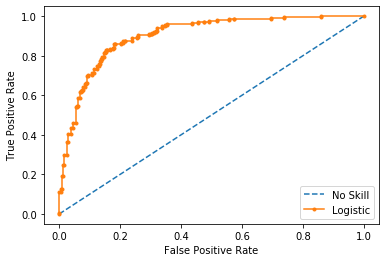

In [9]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Precision-Recall Curves in Python

Logistic: f1=0.841 auc=0.898


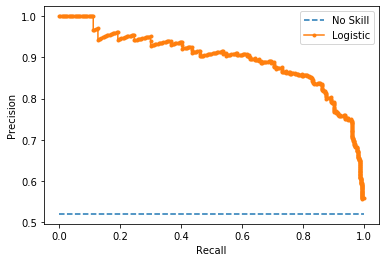

In [10]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1 = f1_score(testy, yhat)
lr_auc  = auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()